Praktikum 2

Setelah pada praktikum pertama kita membandingkan HDBSCAN dengan DBSCAN dan melihat keunggulannya, pada praktikum kedua ini kita akan fokus hanya pada HDBSCAN. Tujuannya adalah memahami bagaimana hasil clustering dapat dipengaruhi oleh perubahan hyperparameter. Dengan mencoba berbagai nilai untuk min_cluster_size, min_samples, dan cut_distance, kita akan melihat bagaimana HDBSCAN mengatur jumlah cluster, memisahkan noise, dan menyesuaikan diri terhadap struktur data yang berbeda.

Langkah 7: Eksperimen Hyperparameter min_cluster_size


Ubah nilai min_cluster_size.



c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and w

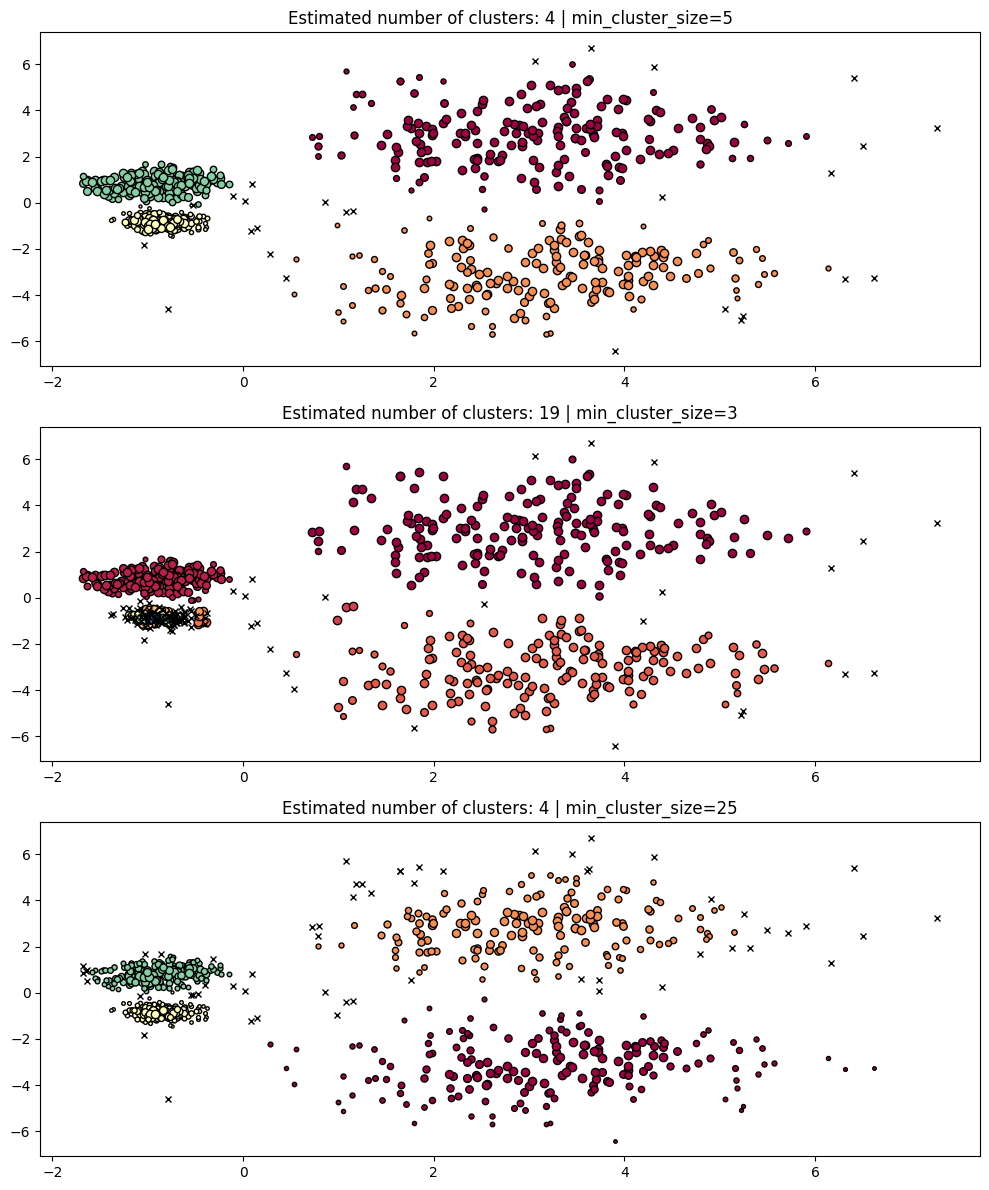

In [ ]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

Langkah 8: Eksperimen Hyperparameter min_samples


c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and w

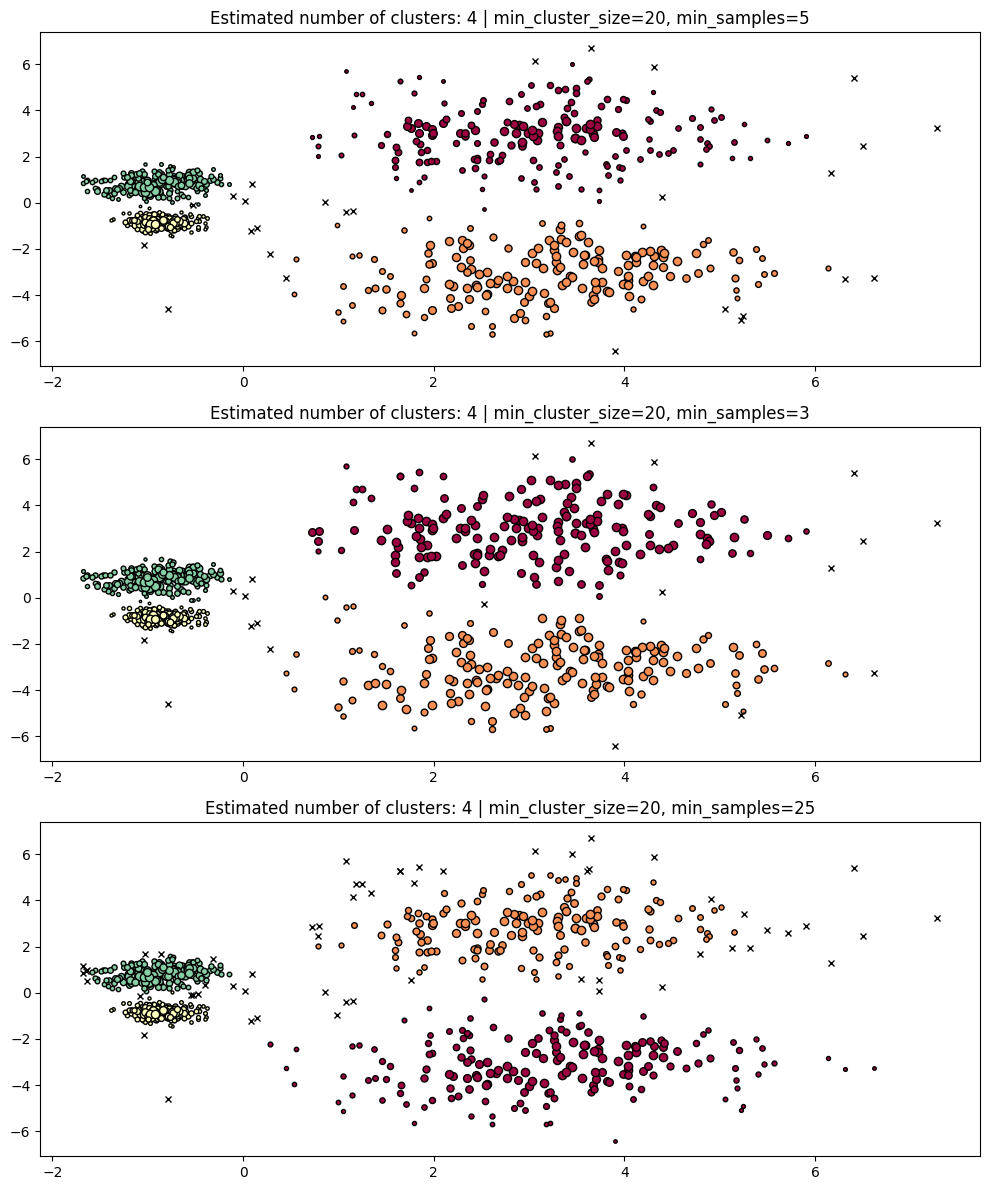

In [ ]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

Langkah 10: Evaluasi dengan Silhouette Score


Silhouette Score adalah metrik yang mengukur seberapa baik sebuah data titik di-cluster dalam grupnya sendiri dibandingkan dengan jarak ke grup terdekat lainnya. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa titik data lebih terisolasi dan lebih cocok dengan cluster-nya.

In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering HDBSCAN
sil_score = silhouette_score(X, hdb.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5336897437447685


- Jika nilai Silhouette Score mendekati 1, ini menunjukkan bahwa clustering berhasil memisahkan data dengan baik.
- Nilai negatif menunjukkan bahwa data mungkin salah kelompok atau tidak tercluster dengan baik.

Langkah 11: Evaluasi dengan Davies-Bouldin Index


Davies-Bouldin Index (DBI) adalah metrik yang mengukur kualitas clustering berdasarkan jarak antar cluster dan seberapa besar sebaran dalam masing-masing cluster. Semakin kecil nilai DBI, semakin baik clustering yang dihasilkan. Nilai DBI yang rendah menunjukkan bahwa cluster saling terpisah dengan baik, sementara nilai yang tinggi menunjukkan bahwa cluster mungkin tumpang tindih.

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk hasil clustering HDBSCAN
dbi_score = davies_bouldin_score(X, hdb.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 1.965990134729654


- Davies-Bouldin Index yang lebih rendah menunjukkan bahwa clustering lebih baik karena cluster lebih terpisah dengan jelas dan homogen.
- Nilai yang lebih tinggi menunjukkan bahwa cluster lebih saling tumpang tindih dan kurang terpisah dengan jelas.

Langkah 12: Visualisasi Hasil Evaluasi


Setelah menghitung Silhouette Score dan Davies-Bouldin Index, kita dapat membuat visualisasi untuk mempermudah pemahaman. Anda bisa memplot hasil Silhouette Score dan Davies-Bouldin Index dalam bentuk grafik untuk membandingkan berbagai eksperimen dengan hyperparameter yang berbeda.

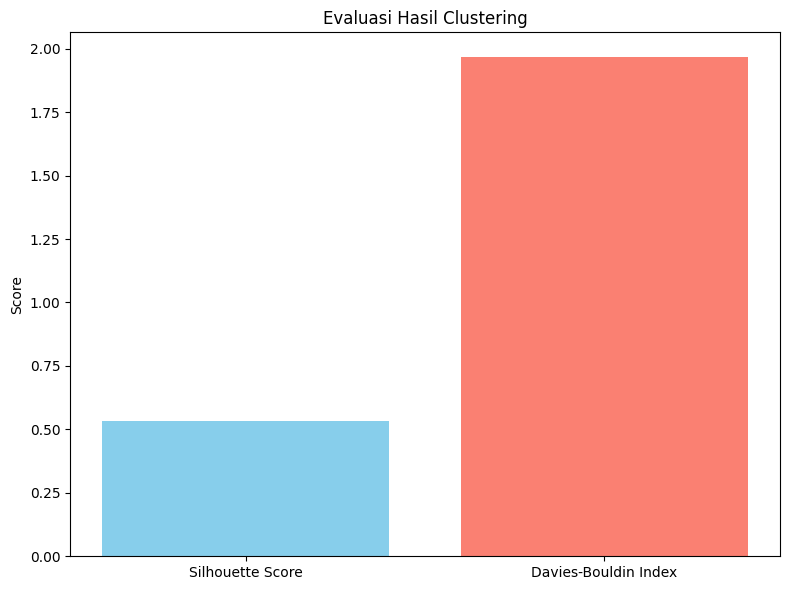

In [ ]:
# Misalnya kita ingin membandingkan DBI dan Silhouette Score untuk beberapa eksperimen
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# Plot hasil evaluasi
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()